In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path='/content/drive/MyDrive/DataSource/data_retail2.xlsx'
df=pd.read_excel(path)
pd.DataFrame(df)


,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
0,536365,2020-12-01 08:26:00,13,SAMARINDA,10001,8992753282401,85123A,123 BENDERA COKLAT 300G,SUSU,6,...,17850.0,DUA PUTRI SLAMET RIYADI,JL. SLAMET RIYADI,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
1,536365,2020-12-01 08:26:00,13,SAMARINDA,20020,8999909192034,71053,2.3.4 FILTER,ROKOK,6,...,17850.0,SANURI,JL. M. SAID,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
2,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20021,8999909007147,84406B,234 KERETEK,ROKOK,8,...,17850.0,EMI MBAK,PS. TALUN NO.63,MAGELANG,JAWA TENGAH,INDONESIA,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI
3,536365,2020-12-01 08:26:00,13,SAMARINDA,20018,8999909172234,84029G,234 KERETEK 12,ROKOK,6,...,17850.0,RISKA CELL ADAM MALIK,JL. ADAM MALIK,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
4,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20019,8999909005860,84029E,234 KERETEK 16,ROKOK,6,...,17850.0,ABADI MART,JL.GROWONG - PUCUNG REJO MUNTILAN.,MAGELANG,JAWA TENGAH,INDONESIA,42,Mini Market,190105,PT. KTRI DISTRIBUSI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2021-12-09 12:50:00,22,MALANG,K0336,8888166603240,22613,KG CHOCO SHORT CAKE 225G,BISKUIT,12,...,12680.0,KPRI DIAN HUSADA (DINAS KESEHATAN),JLN SIMPANG LA SUCIPTO NO 45,MALANG,JAWA TIMUR,INDONESIA,45,Koperasi,220109,PT. KOTAK AGRO SUBUR
541905,581587,2021-12-09 12:50:00,22,MALANG,K1923,8888166993044,22899,KG CHOCO WAY FINGER 33G,BISKUIT,6,...,12680.0,ASSALAM,JLN TELUK BAYUR NO 59,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
541906,581587,2021-12-09 12:50:00,22,MALANG,K0290,8888166336841,23254,KG CISSY 120G CRACKER,BISKUIT,4,...,12680.0,RAHMA TK,JLN SANAN NO. 1A/14 (BLKG LAPAS),MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
541907,581587,2021-12-09 12:50:00,22,MALANG,K3270,8991102023986,23255,KIDDO JUNIOR,PASTA & S-GIGI,4,...,12680.0,KARUNIA,PERUM SUKUN PONDOK INDAH N-9,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR


## 1. Business Understanding

Toko perabot rumah tangga ingin mendapatkan insight penjualan yang mungkin bisa di terapkan, antara lain :
1. Product yang dijual secara bersamaan
2. Pengadaan diskon beli X mendapatkan produk Y

Problem: Asosiasi
Algoritma: Apriori - Unsupervised Learning

## 2. Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   InvoiceNo            541909 non-null  object        
 1   InvoiceDate          541909 non-null  datetime64[ns]
 2   BRANCH_SPLR          541909 non-null  int64         
 3   BRANCHNAME_SPLR      541909 non-null  object        
 4   warehouseProductsID  541909 non-null  object        
 5   BARCODEID            541909 non-null  int64         
 6   StockCode            541909 non-null  object        
 7   PRODUCT              541909 non-null  object        
 8   PRODUCT_CATEGORY     541909 non-null  object        
 9   Quantity             541909 non-null  int64         
 10  UnitPrice            541909 non-null  float64       
 11  UnitPriceRupiah      541909 non-null  float64       
 12  oldCUSTID            541909 non-null  object        
 13  CustomerID    

In [4]:
df.isnull().sum()

InvoiceNo                   0
InvoiceDate                 0
BRANCH_SPLR                 0
BRANCHNAME_SPLR             0
warehouseProductsID         0
BARCODEID                   0
StockCode                   0
PRODUCT                     0
PRODUCT_CATEGORY            0
Quantity                    0
UnitPrice                   0
UnitPriceRupiah             0
oldCUSTID                   0
CustomerID             135080
CUSTNAME                    0
ADDRESS                   172
KOTA                    16672
PROVINSI                14840
NEGARA                      0
CHANNELID_SPLR              0
CHANNELNAME_SPLR            0
SUBDISTID                   0
SUBDIST_NAME                0
dtype: int64

## 3. Data Preparation

In [5]:
!pip install mlxtend

1. Menyesuaikan bentuk data supaya bisa di proses oleh algoritma asosiasi >> apriori
2. Memilih provinsi mana yang akan dimodelkan yaitu Jawa Tengah dan sekaligus merapikan penamaan yang tidak konsisten

In [6]:
df['PROVINSI'].value_counts()

JAWA TENGAH            138644
JAWA TIMUR              95089
JAWA BARAT              83588
KAL-SEL                 21452
KEPULAUAN RIAU          18400
BALI                    17508
BANTEN                  15232
KALIMANTAN TIMUR        13860
DI YOGYAKARTA           13496
Jawa Tengah             13176
NUSA TENGGARA BARAT      8576
Jawa timur               7528
JAWA TENGAH              6636
SULAWESI SELATAN         6428
Kalimantan Timur         6424
LAMPUNG                  6280
DIY                      5740
Sumatera Selatan         5592
RIAU                     5476
KALTENG                  5244
SUMATERA UTARA           5200
SULAWESI UTARA           4648
SUMATERA BARAT           4256
SUMATERA SELATAN         4064
KALIMANTAN SELATAN       3532
KALIMANTAN TENGAH        3432
JAWATENGAH               2956
SULAWESI TENGGARA        2076
SULAWESI TENGAH          1480
KALIMANTAN BARAT          480
KAL-BAR                   320
JAMBI                     148
BANGKA BELITUNG            64
Jawa Barat

In [7]:
df_jateng1=df[df['PROVINSI']=='JAWA TENGAH']
df_jateng2=df[df['PROVINSI']=='Jawa Tengah']
df_jateng3=df[df['PROVINSI']=='JAWATENGAH']
df_jateng4=df[df['PROVINSI']=='JAWA TENGAH ']

df_jateng=pd.concat([df_jateng1, df_jateng2, df_jateng3, df_jateng4], sort=True,axis=0)
df_jateng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161412 entries, 14 to 275606
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ADDRESS              161412 non-null  object        
 1   BARCODEID            161412 non-null  int64         
 2   BRANCHNAME_SPLR      161412 non-null  object        
 3   BRANCH_SPLR          161412 non-null  int64         
 4   CHANNELID_SPLR       161412 non-null  int64         
 5   CHANNELNAME_SPLR     161412 non-null  object        
 6   CUSTNAME             161412 non-null  object        
 7   CustomerID           125579 non-null  float64       
 8   InvoiceDate          161412 non-null  datetime64[ns]
 9   InvoiceNo            161412 non-null  object        
 10  KOTA                 147668 non-null  object        
 11  NEGARA               161412 non-null  object        
 12  PRODUCT              161412 non-null  object        
 13  PRODUCT_CATEG

In [8]:
df_jateng['PROVINSI']=df_jateng['PROVINSI'].replace('JAWA TENGAH','Jawa Tengah')
df_jateng['PROVINSI']=df_jateng['PROVINSI'].replace('JAWATENGAH','Jawa Tengah')
df_jateng['PROVINSI']=df_jateng['PROVINSI'].replace('JAWA TENGAH ','Jawa Tengah')
df_jateng['PROVINSI']=df_jateng['PROVINSI'].replace('Jawa Tengah','Jawa Tengah')

In [9]:
df_jateng['PROVINSI'].value_counts()

Jawa Tengah    161412
Name: PROVINSI, dtype: int64

In [10]:
#Mengubah invoice date ke bentuk datetime
df_jateng['InvoiceDate']=pd.to_datetime(df_jateng['InvoiceDate'])

In [11]:
#Transformasi data bentuk transaksional ke bentuk flat table
##Tahap 1 = mengubah hal yang menjadi prioritas pada keranjang belanja

df_jateng['PRODUCT']=df_jateng['PRODUCT'].str.strip()
df_jateng['PRODUCT_CATEGORY']=df_jateng['PRODUCT_CATEGORY'].str.strip()

In [12]:
df_jateng.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df_jateng['InvoiceNo']=df_jateng['InvoiceNo'].astype('str')
df_jateng=df_jateng[~(df_jateng['InvoiceNo'].str[0]=='C')]

In [13]:
##Tahap 2 = keranjan belanja
basket_jateng=(df_jateng[df_jateng['PROVINSI']=='Jawa Tengah'].groupby(['InvoiceNo','PRODUCT_CATEGORY'])['Quantity'].count()\
               .unstack().reset_index().fillna(0)\
               .set_index('InvoiceNo'))
basket_jateng

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
575899,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575900,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
##Tahap 3 Proses Encoded

def encode_units(x):
  if x<=0:
    return 0
  if x>=1:
    return 1

basket_jateng_set=basket_jateng.applymap(encode_units)
basket_jateng_set

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575898,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
575899,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
575900,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##4. Data Modeling

In [15]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=21cf6b55a9709abb8f6570b0d87cc5745eb40fa149ca1281f96869cbd78dc96c
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [16]:
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import datetime

In [17]:
frequent_itemset=apriori(basket_jateng_set, min_support=0.1, use_colnames=True)
frequent_itemset

#min_support = nilai minimum agar itemset dianggap sering dalam keranjang belanja

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.334659,(ALAT RUMAH TANGGA)
1,0.365000,(BISKUIT)
2,0.176136,(BUMBU)
3,0.174659,(COKELAT)
4,0.283182,(DETERGEN)
...,...,...
290,0.104091,"(PARFUM, OBATAN, KOSMETIK, SABUN & SAMPHOO)"
291,0.100114,"(OBATAN, KOSMETIK, SUSU, SABUN & SAMPHOO)"
292,0.107159,"(PARFUM, KOSMETIK, SUSU, SABUN & SAMPHOO)"
293,0.101591,"(MINUMAN, OBATAN, SUSU, SABUN & SAMPHOO)"


In [18]:
rule_jateng=association_rules(frequent_itemset, metric='lift')
rule_jateng

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BISKUIT),(ALAT RUMAH TANGGA),0.365000,0.334659,0.186136,0.509963,1.523827,0.063986,1.357735,0.541351
1,(ALAT RUMAH TANGGA),(BISKUIT),0.334659,0.365000,0.186136,0.556197,1.523827,0.063986,1.430815,0.516664
2,(ALAT RUMAH TANGGA),(DETERGEN),0.334659,0.283182,0.144773,0.432598,1.527632,0.050003,1.263333,0.519121
3,(DETERGEN),(ALAT RUMAH TANGGA),0.283182,0.334659,0.144773,0.511236,1.527632,0.050003,1.361272,0.481841
4,(ALAT RUMAH TANGGA),(KOSMETIK),0.334659,0.420114,0.188636,0.563667,1.341702,0.048042,1.329000,0.382778
...,...,...,...,...,...,...,...,...,...,...
1575,"(SUSU, SABUN & SAMPHOO)","(PARFUM, MINUMAN)",0.179091,0.202386,0.102386,0.571701,2.824798,0.066141,1.862280,0.786923
1576,(PARFUM),"(MINUMAN, SUSU, SABUN & SAMPHOO)",0.334318,0.140568,0.102386,0.306254,2.178688,0.055392,1.238828,0.812713
1577,(MINUMAN),"(PARFUM, SUSU, SABUN & SAMPHOO)",0.399886,0.122045,0.102386,0.256039,2.097896,0.053582,1.180108,0.872055
1578,(SUSU),"(PARFUM, MINUMAN, SABUN & SAMPHOO)",0.306932,0.145455,0.102386,0.333580,2.293364,0.057742,1.282293,0.813714


##5. Visualisasi Data


In [19]:
import plotly.express as px

rule_jateng['antecedents']=rule_jateng['antecedents'].apply(lambda x: ','.join(list(x)))
rule_jateng['consequents']=rule_jateng['consequents'].apply(lambda x: ','.join(list(x)))

#Plot Visualisasi
fig = px.scatter(
    rule_jateng, x='support', y='confidence', color='lift', size='lift',
    hover_data=['antecedents','consequents'], title='Visualisasi Asosiasi Keranjang Belanja'
)

fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Interpretasi**

Confidence menyatakan tingkat peluang asosiasi terjadi di dunia nyata.
Berdasarkan grafik di atas, confidence tertinggi yaitu 0,882 dimana orang membeli sabun, shampo, obatan, dan susu kemungkinan besar akan membeli minuman juga. Sedangkan confidence terkecil yaitu 0,238, dimana orang yang membeli kosmetik kemungkinan kecil akan membeli detergen, sabun, sampo, dan biskuit.

In [20]:
#Top 25 rules
top_25_rules=rule_jateng.nlargest(25,'lift')
top_25_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1530,"OBATAN,SABUN & SAMPHOO","KOSMETIK,SUSU",0.174091,0.193068,0.100114,0.575065,2.978561,0.066502,1.898955,0.804286
1531,"KOSMETIK,SUSU","OBATAN,SABUN & SAMPHOO",0.193068,0.174091,0.100114,0.518540,2.978561,0.066502,1.715427,0.823201
1557,"MINUMAN,SUSU","OBATAN,SABUN & SAMPHOO",0.197159,0.174091,0.101591,0.515274,2.959797,0.067267,1.703867,0.824745
1560,"OBATAN,SABUN & SAMPHOO","MINUMAN,SUSU",0.174091,0.197159,0.101591,0.583551,2.959797,0.067267,1.927825,0.801709
1528,"OBATAN,KOSMETIK","SUSU,SABUN & SAMPHOO",0.192727,0.179091,0.100114,0.519458,2.900524,0.065598,1.708297,0.811665
1533,"SUSU,SABUN & SAMPHOO","OBATAN,KOSMETIK",0.179091,0.192727,0.100114,0.559010,2.900524,0.065598,1.830593,0.798182
1556,"MINUMAN,OBATAN","SUSU,SABUN & SAMPHOO",0.196818,0.179091,0.101591,0.516166,2.882147,0.066343,1.696676,0.813062
1561,"SUSU,SABUN & SAMPHOO","MINUMAN,OBATAN",0.179091,0.196818,0.101591,0.567259,2.882147,0.066343,1.856033,0.795504
1278,"BISKUIT,SABUN & SAMPHOO","SNACK,KOSMETIK",0.200682,0.180568,0.103750,0.516988,2.863115,0.067513,1.696502,0.814106
1279,"SNACK,KOSMETIK","BISKUIT,SABUN & SAMPHOO",0.180568,0.200682,0.103750,0.574575,2.863115,0.067513,1.878871,0.794124


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



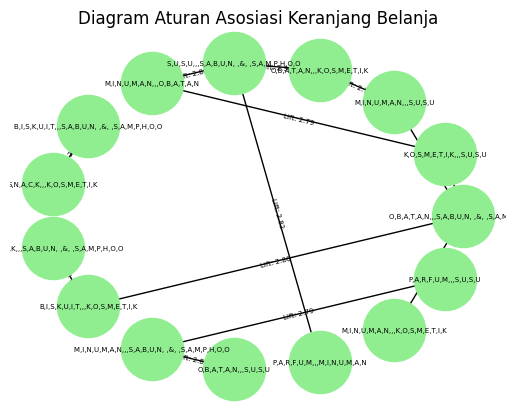

In [21]:
import networkx as nx

#Membuat object graph dari NetworkX
G = nx.Graph()

#Menambahkan node pada graph
for index, row in top_25_rules.iterrows():
  antecedents = ','.join(row['antecedents'])
  consequents = ','.join(row['consequents'])

  #Menambahkan node untuk antecedents dan consequents
  G.add_node(antecedents,label=antecedents)
  G.add_node(consequents,label=consequents)

  #Menambahkan edge (hubungan) antara antecedents dan consequents
  G.add_edge(antecedents, consequents, weight=row['lift'])

#Membuat layout circular untuk node
pos = nx.circular_layout(G, scale=4)

#Gambar node
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels= node_labels,font_size=5)

#Gambar edge (garis yang menghubungkan node)
edge_labels={(antecedents, consequents): f'Lift: {lift:.2f}' for antecedents, consequents, lift in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=5)

#Gambar node dan edge
nx.draw(G, pos, with_labels=False, node_size=2000, node_color='lightgreen', font_size=5, font_color='black', font_weight='bold', width=1)

#Menampilkan diagram
plt.title('Diagram Aturan Asosiasi Keranjang Belanja')
plt.axis('off')
plt.show()

**Interpretasi Diagram**

Diagram di atas menggambarkan asosiasi sesuai dengan aturannya dan menunjukkan kecenderungan dalam belanja. Dapat dilihat bahwa Susu, sabun dan sampo memiliki hubungan dengan parfum, minuman, sehingga dari sini perusahaan dapat mengambil keputusan untuk memberi perlakuan tertentu (diskon, gratis item) agar konsumen dapat membeli lebih.